### Setup

In [213]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fmena14/volcanoesvenus")

print("Path to dataset files:", path)

Path to dataset files: /Users/gabrieledurante/.cache/kagglehub/datasets/fmena14/volcanoesvenus/versions/1


In [214]:
import os

files = os.listdir(path)
print(files)

['Volcanoes_train', 'Volcanoes_test']


### Data Preparation

In [215]:
import numpy as np
import pandas as pd

import os
print(os.listdir(path))

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

['Volcanoes_train', 'Volcanoes_test']


In [216]:
print(X_train.head())
print(y_train.head())

    95  101   99  103  95.1   86   96   89   70  104  ...  111.214  107.329  \
0   91   92   91   89    92   93   96  101  107  104  ...      103       92   
1   87   70   72   74    84   78   93  104  106  106  ...       84       71   
2    0    0    0    0     0    0    0    0    0    0  ...       94       81   
3  114  118  124  119    95  118  105  116  123  112  ...      116      113   
4   79   95   90   82    73   74   77   75   82   87  ...       90       80   

   92.354  89.258  103.379  99.414  117.112  116.103  118.82  96.423  
0      93      95       98     105      104      100      90      81  
1      95     102       94      80       91       80      84      90  
2      89      84       80      90       92       80      88      96  
3     102      93      109     104      106      117     111     115  
4      79      78       65      71       62       97      89      73  

[5 rows x 12100 columns]
   Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46    

In [217]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (6999, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2733, 12100) 
y_test shape:	 (2734, 4)


In [218]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1  # shifting index
    X.sort_index(inplace=True)  # sorting the index

XFix(X_train)
XFix(X_test)

In [219]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (7000, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2734, 12100) 
y_test shape:	 (2734, 4)


### Some statistics

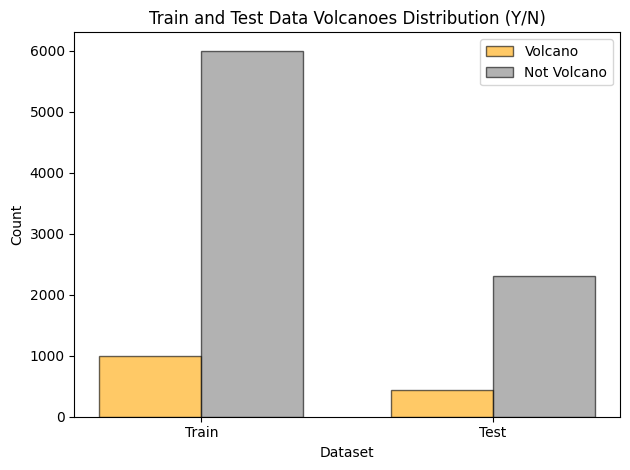

In [220]:
import matplotlib.pyplot as plt
import numpy as np

y_trainVolcanoCount = y_train[y_train["Volcano?"] == 1].shape[0]
y_testVolcanoCount = y_test[y_test["Volcano?"] == 1].shape[0]

y_trainNotVolcanoCount = y_train[y_train["Volcano?"] == 0].shape[0]
y_testNotVolcanoCount = y_test[y_test["Volcano?"] == 0].shape[0]

x = ['Train', 'Test']
y_volcano = [y_trainVolcanoCount, y_testVolcanoCount]
y_not_volcano = [y_trainNotVolcanoCount, y_testNotVolcanoCount]

bar_width = 0.35
x_positions = np.arange(len(x))

plt.bar(x_positions - bar_width / 2, y_volcano, width=bar_width, label='Volcano', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions + bar_width / 2, y_not_volcano, width=bar_width, label='Not Volcano', color='gray', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Volcanoes Distribution (Y/N)')
plt.legend()
plt.tight_layout()
plt.show()

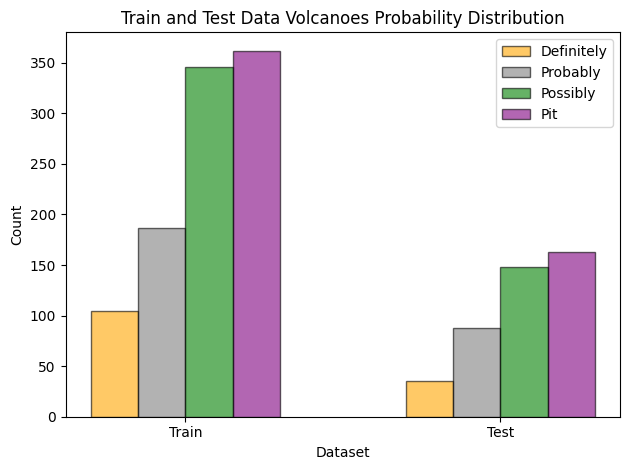

In [221]:
y_trainTypeDefinitelyCount = y_train[y_train["Type"] == 1].shape[0]
y_testTypeDefinitelyCount = y_test[y_test["Type"] == 1].shape[0]

y_trainTypeProbablyCount = y_train[y_train["Type"] == 2].shape[0]
y_testTypeProbablyCount = y_test[y_test["Type"] == 2].shape[0]

y_trainTypePossiblyCount = y_train[y_train["Type"] == 3].shape[0]
y_testTypePossiblyCount = y_test[y_test["Type"] == 3].shape[0]

y_trainTypePitCount = y_train[y_train["Type"] == 4].shape[0]
y_testTypePitCount = y_test[y_test["Type"] == 4].shape[0]

x = ['Train', 'Test']
y1 = [y_trainTypeDefinitelyCount, y_testTypeDefinitelyCount]
y2 = [y_trainTypeProbablyCount, y_testTypeProbablyCount]
y3 = [y_trainTypePossiblyCount, y_testTypePossiblyCount]
y4 = [y_trainTypePitCount, y_testTypePitCount]


bar_width = 0.15
x_positions = np.arange(len(x))

plt.bar(x_positions - 1.5 * bar_width, y1, width=bar_width, label='Definitely', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions - 0.5 * bar_width, y2, width=bar_width, label='Probably', color='gray', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 0.5 * bar_width, y3, width=bar_width, label='Possibly', color='green', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 1.5 * bar_width, y4, width=bar_width, label='Pit', color='purple', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Volcanoes Probability Distribution')
plt.legend()
plt.tight_layout()
plt.show()

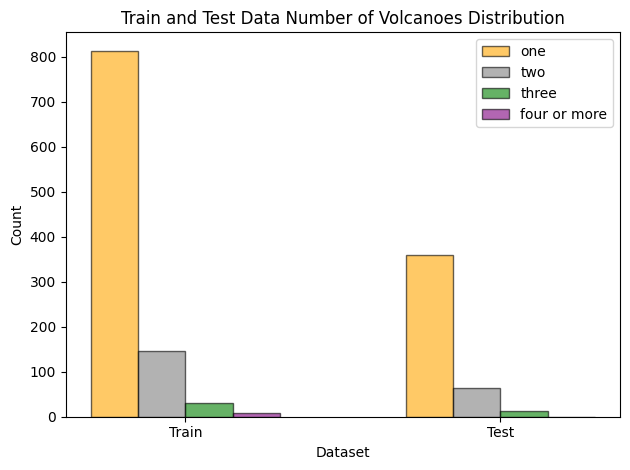

In [222]:
y_trainNumberVolcanoesOnelyCount = y_train[y_train["Number Volcanoes"] == 1].shape[0]
y_testNumberVolcanoesOneCount = y_test[y_test["Number Volcanoes"] == 1].shape[0]

y_trainNumberVolcanoesTwoCount = y_train[y_train["Number Volcanoes"] == 2].shape[0]
y_testNumberVolcanoesTwoCount = y_test[y_test["Number Volcanoes"] == 2].shape[0]

y_trainNumberVolcanoesThreeCount = y_train[y_train["Number Volcanoes"] == 3].shape[0]
y_testNumberVolcanoesThreeCount = y_test[y_test["Number Volcanoes"] == 3].shape[0]

y_trainNumberVolcanoesFourCount = y_train[y_train["Number Volcanoes"] >= 4].shape[0]
y_testNumberVolcanoesFourCount = y_test[y_test["Number Volcanoes"] >= 4].shape[0]

x = ['Train', 'Test']
y1 = [y_trainNumberVolcanoesOnelyCount, y_testNumberVolcanoesOneCount]
y2 = [y_trainNumberVolcanoesTwoCount, y_testNumberVolcanoesTwoCount]
y3 = [y_trainNumberVolcanoesThreeCount, y_testNumberVolcanoesThreeCount]
y4 = [y_trainNumberVolcanoesFourCount, y_testNumberVolcanoesFourCount]

bar_width = 0.15
x_positions = np.arange(len(x))

plt.bar(x_positions - 1.5 * bar_width, y1, width=bar_width, label='one', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions - 0.5 * bar_width, y2, width=bar_width, label='two', color='gray', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 0.5 * bar_width, y3, width=bar_width, label='three', color='green', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 1.5 * bar_width, y4, width=bar_width, label='four or more', color='purple', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Number of Volcanoes Distribution')
plt.legend()
plt.tight_layout()
plt.show()

### Single visualization

In [223]:
#Reshape 
X_test_vis = X_test.values.reshape((X_test.shape[0],1,110,110)) 
X_train_vis = X_train.values.reshape((X_train.shape[0],1,110,110))
print(X_train_vis.shape)

(7000, 1, 110, 110)


In [224]:
#preprocess
X_test_vis = X_test_vis/255.0
X_train_vis = X_train_vis/255.0
#Transpose to tensorflow dimension.
X_test_vis = X_test_vis.transpose([0,2, 3, 1])
X_train_vis = X_train_vis.transpose([0,2, 3, 1])
print(X_train_vis.shape)

(7000, 110, 110, 1)


In [227]:
import matplotlib.pyplot as plt
import numpy as np

label_names = ["No", "Yes"]

def visualize(X, Y, save_path=None):
    # Randomly select an example
    n = np.random.randint(0, X.shape[0])
    aux = X[n]
    
    # Create a figure and axis
    f, ax = plt.subplots(1, figsize=(8, 3))
    ax.set_title("Volcano?: %s" % (label_names[Y["Volcano?"][n]]))

    # Display the image with copper colormap
    ax.imshow(aux[:, :, 0], cmap='copper')  # One channel
    ax.set_yticks([])
    ax.set_xticks([])
    
    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()
    
    # Print details about the selected example
    print("Detail:", Y.loc[n, :])

# Example usage:
# visualize(X, Y, save_path="example_volcano.png")


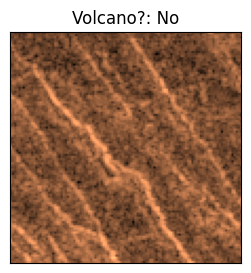

Detail: Volcano?            0.0
Type                NaN
Radius              NaN
Number Volcanoes    NaN
Name: 5147, dtype: float64


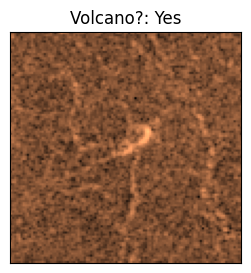

Detail: Volcano?            1.00
Type                4.00
Radius              2.24
Number Volcanoes    2.00
Name: 5201, dtype: float64


In [229]:
visualize(X_train_vis, y_train, save_path="images/example1_volcano.png")
visualize(X_train_vis, y_train, save_path="images/example2_volcano.png")

### Visualization

In [128]:
import warnings

y_train_copy = y_train.copy(deep=True)
X_train_copy = X_train.copy(deep=True)

X_train_copy = np.resize(X_train_copy, (7000, 110, 110))

y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
y_train_copy.loc[y_train_copy["Type"] == 2, 'Type'] = "Probably Volcano"
y_train_copy.loc[y_train_copy["Type"] == 3, 'Type'] = "Possibly Volcano"
y_train_copy.loc[y_train_copy["Type"] == 4, 'Type'] = "Only Pit is Visible"

y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
y_train_copy.loc[y_train_copy["Volcano?"] == 1, 'Volcano?'] = "Volcano"

y_train_copy.loc[y_train_copy["Number Volcanoes"] == 1, 'Number Volcanoes'] = "One Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 2, 'Number Volcanoes'] = "Two Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 3, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 4, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 5, 'Number Volcanoes'] = "Three or More Volcano"

/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_9785/1980578206.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Definitely Volcano' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_9785/1980578206.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Volcano' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_9785/1980578206.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'One 

In [ ]:
from matplotlib import pyplot as plt

def draw_images(feature, cmap="copper"):
    featureTypes = (y_train_copy.groupby([feature])[feature].nunique()).index
    n_features = min(len(featureTypes), 3)  # Adjust dynamically for up to 3 feature types
    f, ax = plt.subplots(1, n_features, figsize=(4 * n_features, 6))
    
    if n_features == 1:
        ax = [ax]
    
    for i, typ in enumerate(featureTypes[:n_features]):
        sample = y_train_copy[y_train_copy[feature] == typ].sample(1)
        imageIndex = sample.iloc[0].name
        image = X_train_copy[imageIndex]
        ax[i].imshow(image, resample=True, cmap=cmap)
        ax[i].set_title(typ, fontsize=13)
        ax[i].axis("off")
    
    plt.tight_layout()
    plt.show()


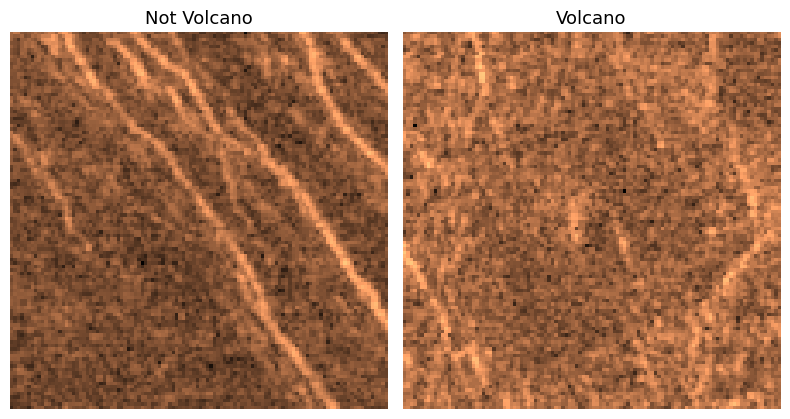

In [130]:
draw_images("Volcano?")

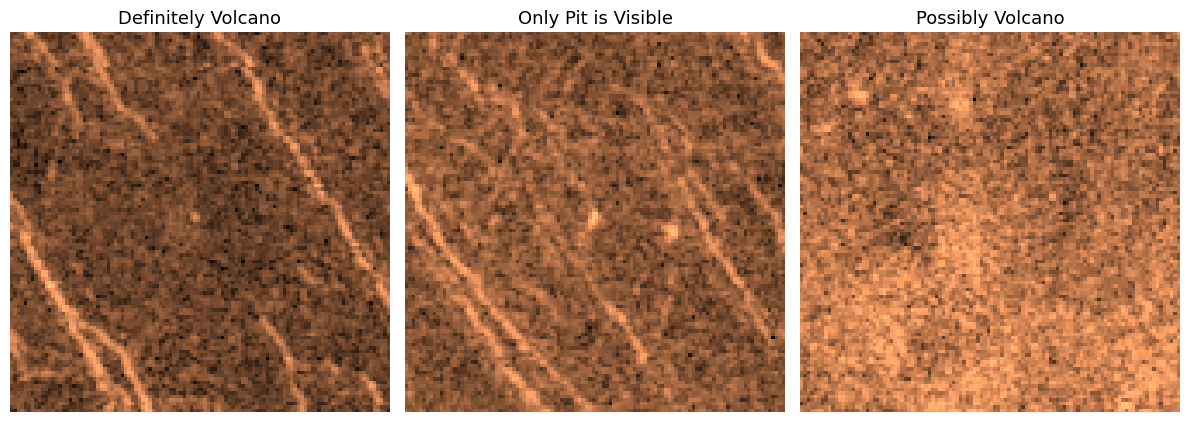

In [131]:
draw_images("Type")

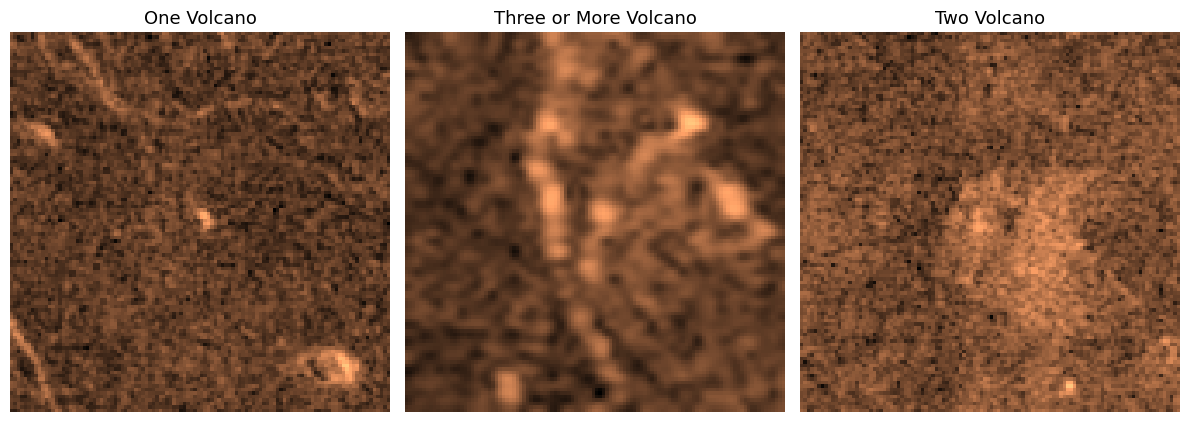

In [132]:
draw_images("Number Volcanoes")

### CNN models

In [176]:
from sklearn.model_selection import train_test_split
# we want to implement the valuation split so we divide the test set by 50%

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2024)
print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (7000, 12100) 
	y_train -> (7000, 4) 

%15	X_test -> (1367, 12100) 
	y_test -> (1367, 4) 

%15	X_val -> (1367, 12100) 
	y_val -> (1367, 4)


In [177]:
# resizing for keras, we want to specify the color channel
X_test = np.resize(X_test, (1367, 110, 110, 1)) # 110 x 110 x 1 = 12100
X_train = np.resize(X_train, (7000, 110, 110, 1))
X_val = np.resize(X_val, (1367, 110, 110, 1))

print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (7000, 110, 110, 1) 
	y_train -> (7000, 4) 

%15	X_test -> (1367, 110, 110, 1) 
	y_test -> (1367, 4) 

%15	X_val -> (1367, 110, 110, 1) 
	y_val -> (1367, 4)


In [178]:
# focus only to this variable (Y/n), binary classification
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]
y_val = y_val["Volcano?"]

In [179]:
# we need to normalize our pixels from 0-255 to 0-1. But why we do this?
# The goal of normalization is to change the values of numeric columns in the dataset to use a common scale,
# without distorting differences in the ranges of values or losing information.
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [180]:
# pip install --upgrade tensorflow keras

In [181]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)

In [182]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam

modelA = Sequential()
modelA.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', input_shape = (110,110,1)))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Conv2D(filters = 16, kernel_size = (3,3), activation ='relu'))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Flatten())
modelA.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [230]:
# view the model in HTML version, in paper use this PNG version
modelA.save("images/netron_graphs/modelA.h5")

# -> console: netron modelA.h5 

In [184]:
# from tensorflow.keras.utils import plot_model

# plot_model(
#     modelA,
#     to_file='modelA_plot.png',
#     show_shapes=True,                 # Mostra le forme degli input/output
#     show_layer_names=True,            # Mostra i nomi dei layer
#     dpi=80,                          # Aumenta i punti per pollice (immagine più compatta)
#     rankdir='TB'                      # Direzione dall'alto al basso
# )

In [185]:
modelA.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 106, 106, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 53, 53, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 51, 51, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │        20,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,378 (83.51 KB)

 Trainable params: 21,378 (83.51 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training

Model A

In [187]:
modelA_trained = modelA.fit(X_train, y_train, batch_size=64, epochs = 25, validation_data = (X_val,y_val))

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.8561 - loss: 0.4436 - val_accuracy: 0.8420 - val_loss: 0.4310
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 163ms/step - accuracy: 0.8545 - loss: 0.4031 - val_accuracy: 0.8420 - val_loss: 0.3947
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.8672 - loss: 0.3430 - val_accuracy: 0.8508 - val_loss: 0.3345
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 159ms/step - accuracy: 0.8996 - loss: 0.2609 - val_accuracy: 0.9042 - val_loss: 0.2471
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.9324 - loss: 0.1922 - val_accuracy: 0.9268 - val_loss: 0.2257
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.9320 - loss: 0.1898 - val_accuracy: 0.9254 - val_loss: 0.2092
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.9446 - loss: 0.1635 - val_accuracy: 0.9327 - val_loss: 0.1925
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.9514 - loss: 0

In [188]:
print(modelA.history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


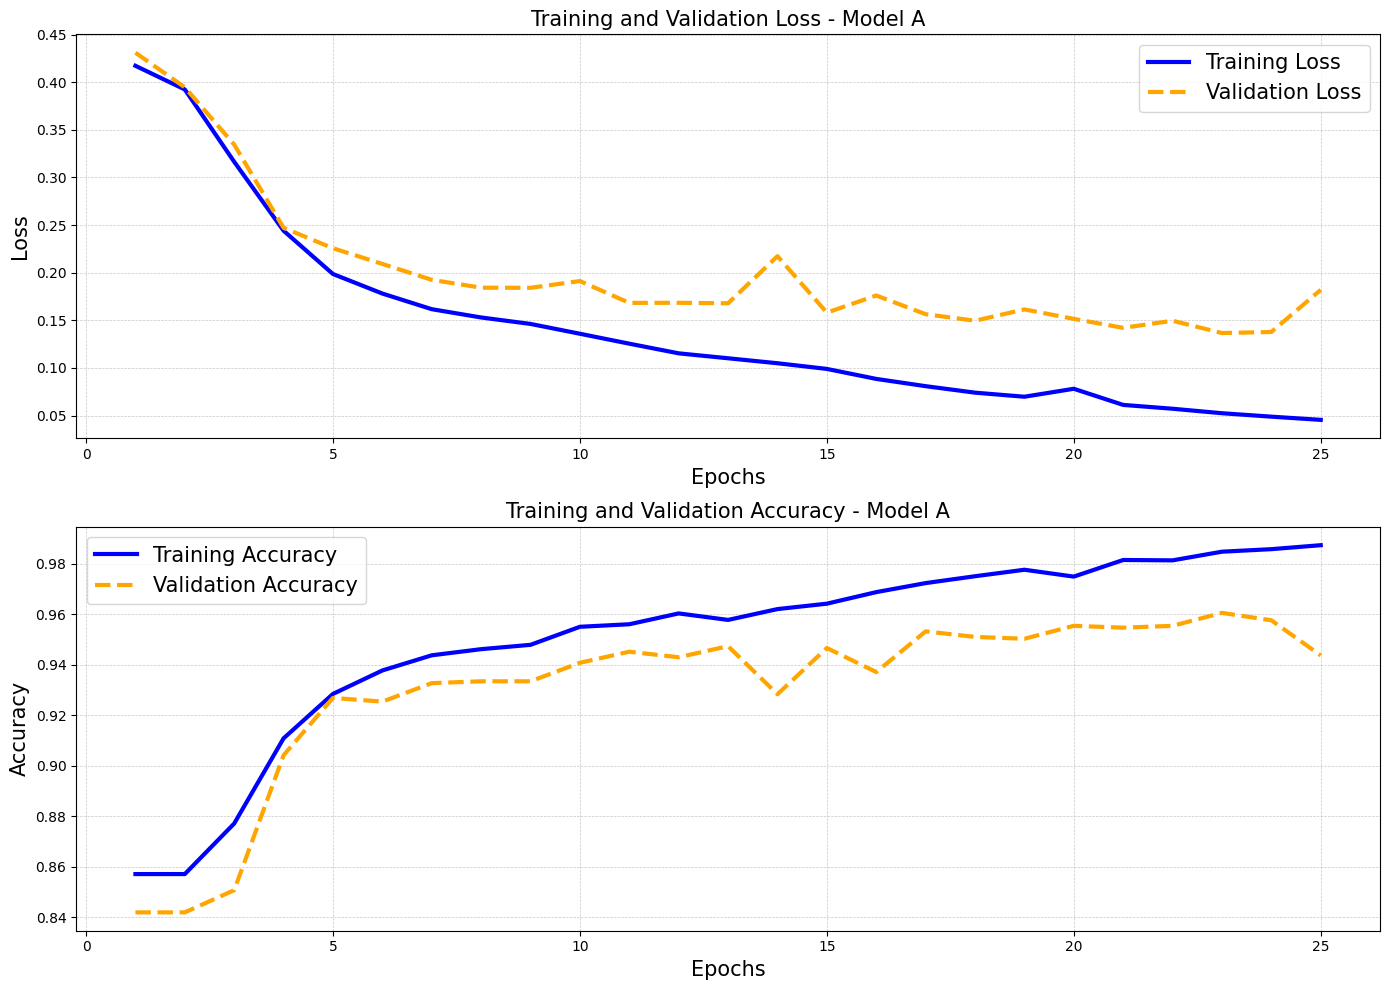

In [208]:
import matplotlib.pyplot as plt

def training_results_graph(model, model_code):
    epochs = range(1, len(model.history['loss']) + 1)
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    accuracy = model.history['accuracy']
    val_accuracy = model.history['val_accuracy']

    plt.figure(figsize=(14, 10))

    # Plot for Loss
    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, label='Training Loss', color='blue', linewidth=3)
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=3)
    plt.title(f'Training and Validation Loss - Model {model_code}', fontsize=15)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # Plot for Accuracy
    plt.subplot(2, 1, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy', color='blue', linewidth=3)
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', linestyle='--', linewidth=3)
    plt.title(f'Training and Validation Accuracy - Model {model_code}', fontsize=15)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()

    # Save the figure with high resolution
    plt.savefig(f'images/{model_code}_training_results.png', dpi=300, bbox_inches='tight')

    plt.show()

training_results_graph(modelA_trained, 'A')

In [190]:
scoreA = modelA.evaluate(X_test, y_test)
print('Test Loss ->', scoreA[0])
print('Test Accuracy ->', scoreA[1])

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9582 - loss: 0.1704
Test Loss -> 0.1794278621673584
Test Accuracy -> 0.9531821608543396


Model B

Add dropouts and data cleaning. 
We have some blank/black images in our data. We try to get rid of them to make our model better.
We can detect the images which are completely black however the detection of the partly corrupted images will be more difficult.

Find black pixel series in all images and delete them if the series' length passed the 10 pixels.
We need to flatten(resize 1D array) back our images then sum every 10 pixels.
If sum equals to 0 there is corruption in the image.
There is an important problem here If the image started to corrupt from the upper side my perfect :/ 
method will not work (Please comment if you have better)
because every 110th pixel will be black in this situation. 
So I use range's third parameter and jump every 119 pixel in loop

```
range([start], stop[, step])
    *start: Starting number of the sequence.
    *stop: Generate numbers up to, but not including this number.
    *step: Difference between each number in the sequence.
```

In [191]:
def corruptedImages(data):
    corruptedImagesIndex = []
    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image)):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0:
            corruptedImagesIndex.append(index)
        else:
            sum = 0

    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image),110):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0 and index not in corruptedImagesIndex:
            corruptedImagesIndex.append(index)
        else:
            sum = 0
    return corruptedImagesIndex
 
print(str(len(corruptedImages(X_train_copy)))+" corrupted images")

209 corrupted images


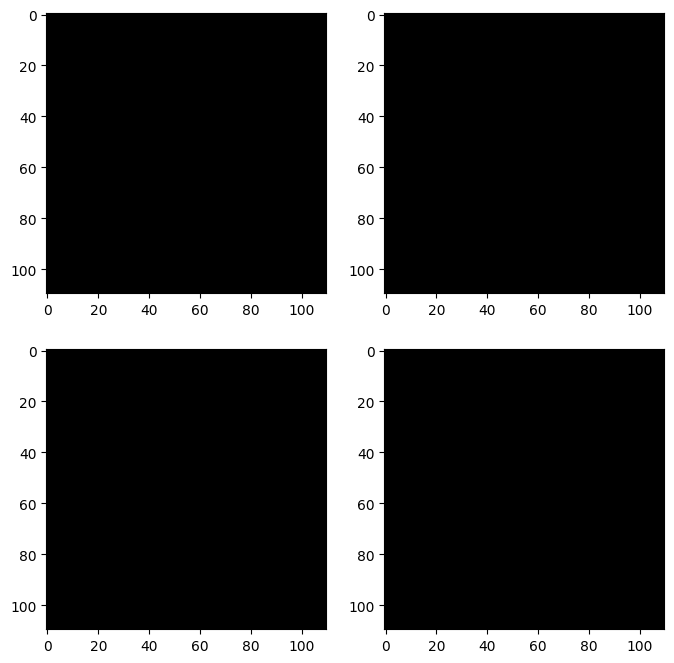

In [192]:
trainCorruptedList = corruptedImages(X_train_copy)

import random
random.shuffle(trainCorruptedList)

f, axarr = plt.subplots(2,2,figsize=(8,8))
for i in range(2):
    for j in range(2):
        axarr[i,j].imshow(X_train_copy[trainCorruptedList[i*2+j]], cmap="copper")

In [193]:
import os
print(os.listdir(path))

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

# Fix the column names
XFix(X_train)
XFix(X_test)

def deleteCorrupted(X, y, corruptedIndexList):
    for i in corruptedIndexList:
        X.drop(i, inplace=True) # Drop the corrupted
        y.drop(i, inplace=True) 
    
    X.reset_index(inplace=True) # Reconstruct the index
    X.drop(['index'], axis=1, inplace=True) # Delete old index column
    #Because they are pandas.series we don't need to deal with index
    #Because we use inplace=True we don't need to return something
    
trainCorruptedList = corruptedImages(X_train)
testCorruptedList = corruptedImages(X_test)

deleteCorrupted(X_train, y_train, trainCorruptedList)
deleteCorrupted(X_test, y_test, testCorruptedList)

['Volcanoes_train', 'Volcanoes_test']


In [194]:
print("X_train:\t",X_train.shape,"\ny_train:\t",y_train.shape,"\nX_test:\t\t",X_test.shape,"\ny_test:\t\t",y_test.shape)

X_train:	 (6791, 12100) 
y_train:	 (6791, 4) 
X_test:		 (2655, 12100) 
y_test:		 (2655, 4)


In [195]:
# Get our label
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Label encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

# Spliting
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=22)

# Lastly resizing
X_test = np.resize(X_test, (X_test.shape[0], 110, 110, 1))
X_train = np.resize(X_train, (X_train.shape[0], 110, 110, 1))
X_val = np.resize(X_val, (X_val.shape[0], 110, 110, 1))

In [196]:
print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,
      "\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,
      "\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (6791, 110, 110, 1) 
	y_train -> (6791, 2) 

%15	X_test -> (1327, 110, 110, 1) 
	y_test -> (1327, 2) 

%15	X_val -> (1328, 110, 110, 1) 
	y_val -> (1328, 2)


In [197]:
modelB = Sequential()
modelB.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (110,110,1)))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Flatten())
modelB.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [198]:
modelB.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 110, 110, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 55, 55, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 11664)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │        23,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,706 (96.51 KB)

 Trainable params: 24,706 (96.51 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
modelB.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelB_trained = modelB.fit(X_train, y_train, batch_size=64, epochs = 25, validation_data = (X_val,y_val))

Epoch 1/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 24s 178ms/step - accuracy: 0.8247 - loss: 0.4962 - val_accuracy: 0.8245 - val_loss: 0.6122
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.8605 - loss: 0.4052 - val_accuracy: 0.8245 - val_loss: 0.5877
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.8592 - loss: 0.4050 - val_accuracy: 0.8245 - val_loss: 0.5856
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.8524 - loss: 0.4121 - val_accuracy: 0.8245 - val_loss: 0.5645
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.8583 - loss: 0.4033 - val_accuracy: 0.8245 - val_loss: 0.6044
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.8508 - loss: 0.4001 - val_accuracy: 0.8245 - val_loss: 0.5360
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.8561 - loss: 0.3737 - val_accuracy: 0.8652 - val_loss: 0.4442
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.8807 - loss: 0

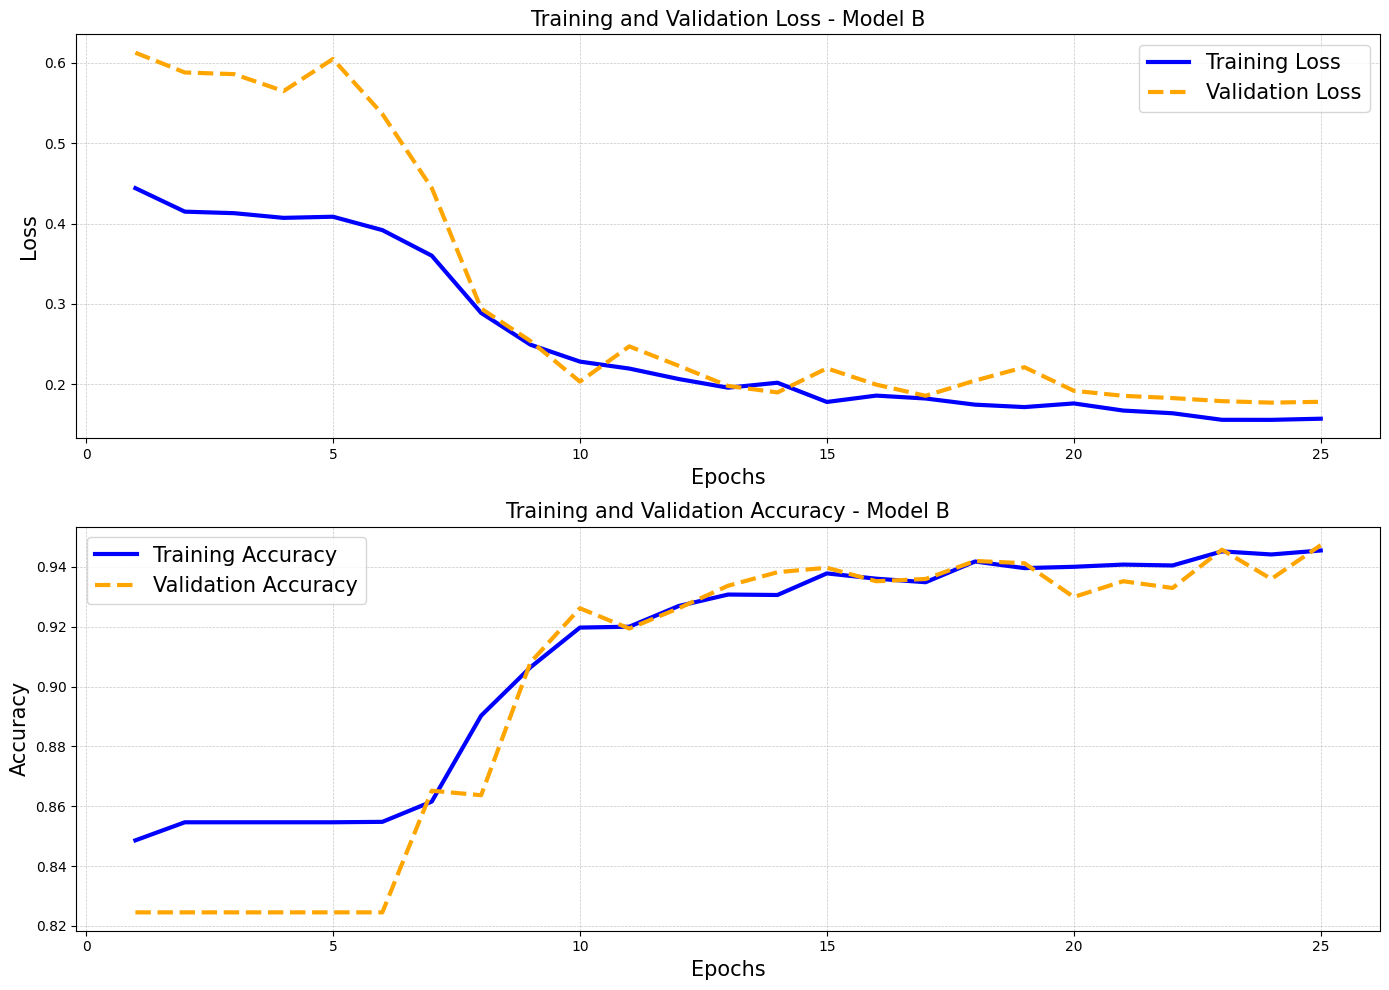

In [209]:
training_results_graph(modelB_trained, 'B')

In [201]:
scoreB = modelB.evaluate(X_test, y_test)
print('Test Loss ->', scoreB[0])
print('Test Accuracy ->', scoreB[1])

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9472 - loss: 0.1693
Test Loss -> 0.16951534152030945
Test Accuracy -> 0.9502637386322021


Model comparison

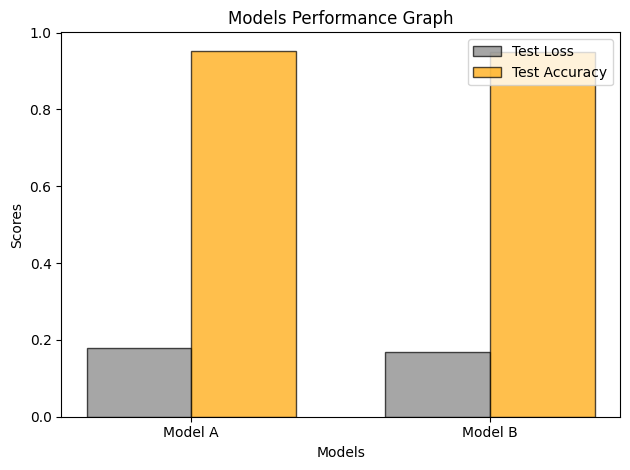

In [210]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Model A', 'Model B']
y = [scoreA[0], scoreB[0]]
y2 = [scoreA[1], scoreB[1]]

# Bar width and positions
bar_width = 0.35
x_positions = np.arange(len(x))

# Create the bar chart
plt.bar(x_positions - bar_width / 2, y, width=bar_width, label='Test Loss', color='grey', edgecolor='black', alpha=0.7)
plt.bar(x_positions + bar_width / 2, y2, width=bar_width, label='Test Accuracy', color='orange', edgecolor='black', alpha=0.7)

# Plot
plt.xticks(x_positions, x)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Models Performance Graph')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/models_performance.png', dpi=300, bbox_inches='tight')
plt.show()